# Visualize high dimensional decision boundaries in 2D (Voronoi tesellation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
dataf = load_breast_cancer()
data = dataf.data.tolist()
target = dataf.target.tolist()
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)

In [4]:
from sklearn.svm import LinearSVC
SVM = LinearSVC(C = 1)
model = SVM.fit(data_std,target)

In [28]:
from sklearn.decomposition import PCA
X = PCA(n_components = 2).fit_transform(data_std)
Y = target
Y_predicted = model.predict(data_std)

In [34]:
h = 0.1
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

from sklearn.neighbors.classification import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
voronoi_model = knn.fit(X,Y_predicted)

Z = voronoi_model.predict(np.c_[xx.ravel(), yy.ravel()])

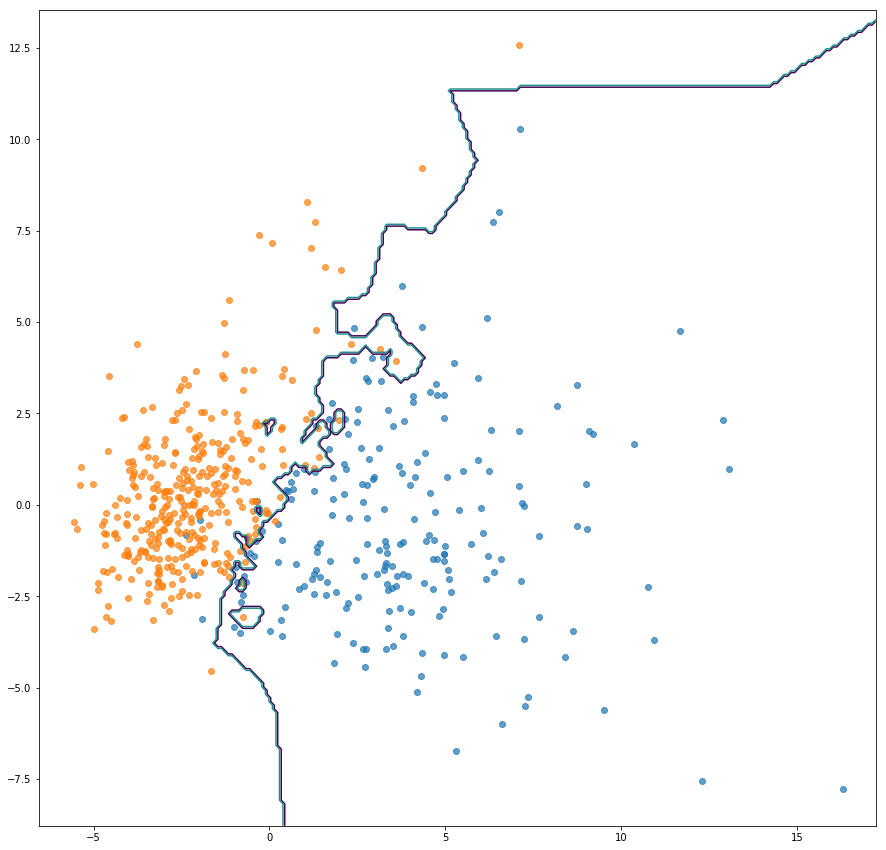

In [37]:
fig = plt.figure(figsize = (15,15))

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels = [0,0.5,1])

frame = pd.DataFrame({"x1": X[:,0], "x2": X[:,1], "label": Y})
frame_0 = frame[frame["label"]==0]
frame_1 = frame[frame["label"]==1]

X1,X2 = frame_0["x1"], frame_0["x2"]
plt.scatter(X1,X2, alpha = 0.7)
X1,X2 = frame_1["x1"], frame_1["x2"]
plt.scatter(X1,X2, alpha = 0.7)

plt.show()